## MAXCUT問題、自然数分割問題

グラフ問題であるMAXCUT問題と自然数分割問題に関するチュートリアルについて説明します。  


### MAXCUT問題

MAXCUT問題は、一筆書きで切ることのできる最大の辺の数を求めるという問題です。  
問題設定としては、辺の両側の点の値が異なっていれば切れるという判定になります。  



### MAXCUT問題の例

具体的にどのような問題を解くか確認します。  
下の図のように、あるグラフが与えられているときに、グラフの辺をたどってグラフを2分割します。  
2分割するときに、なるべく多くの辺を通るように分割する問題をMAXCUT問題といいます。  
下の例では、左のグラフはMAXCUT=5、右のグラフはMAXCUT=6となります。  
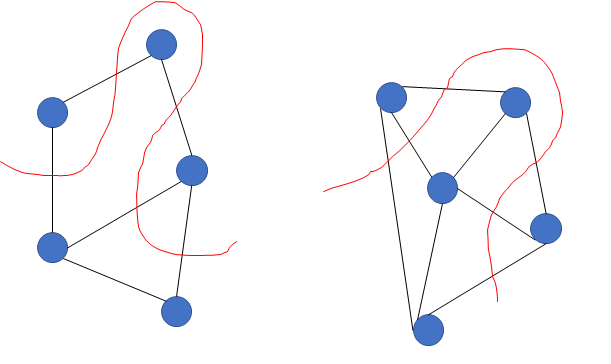

### MAXCUT問題をどのようにQUBOに変換するか

グラフを一筆書きで切ることをどのようにQUBOにすればよいか考えます。  
グラフを分割するために、ノードの数だけ量子ビットを用意します。
エッジの両端のノードの値が異なるときにグラフをカットするとします。  
カットするノードが多いときにコストが小さくなるようなQUBO式を作ることでMAXCUT問題を解きます。
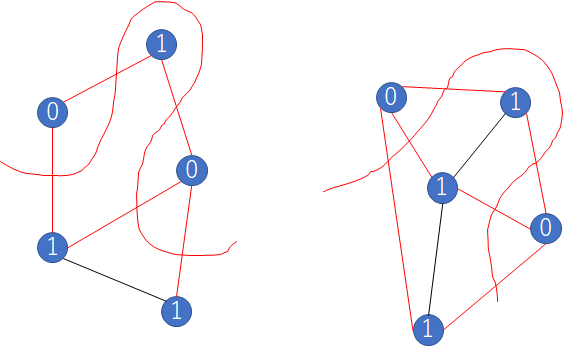

### MAXCUT問題のQUBO式
もし、量子ビット$s_i$が+1と-1のスピン変数を取るのであれば、QUBO式(この場合はイジング式といいます)は、  

$$
C = \sum_{i,j}s_is_j
$$

とコスト関数を記述できます。  
これは、$s_i$と$s_j$が+1と-1もしくは-1と+1のときにコストが小さくなることから確認できます。

一般に量子ビットは0と1で記述されることが多いために、$s_i = 2q_i-1$と変換することで0と1の変数に変換することができます。  
変換後のコスト関数は、

$$
C = \sum_{i,j}(-q_i-q_j + 2q_iq_j)
$$

となります。

元に戻って、上記のQUBO式に実際の値を入れてみます。  
頂点の登場回数とつながっているところだけを入れる必要がありますので、

$$
C = (-q_0-q_1+2q_0q_1) + (-q_1-q_2+2q_1q_2) + (-q_0-q_3+2q_0q_3) + (-q_2-q_3+2q_2q_3) + (-q_2-q_4+2q_2q_4) + (-q_3-q_4+2q_3q_4)
$$

同じ変数はまとめられます。

$$
C = -2q_0 -2q_1 -3q_2 -3q_3 -2q_4 +2q_0q_1 +2q_1q_2 +2q_0q_3 +2q_2q_3 +2q_2q_4 +2q_3q_4
$$

こちらの係数が大事になりますが、これをそのまま式に入れます。  

### 使用するツールのインストール

グラフ問題は、matplotlibと呼ばれる、グラフを描画するライブラリを使うことで、グラフ問題を可視化することが出来ます。  


In [ ]:
!pip install --quiet networkx matplotlib

TYTAN SDKをインストールも行います。

In [ ]:
!pip install -q git+https://github.com/tytansdk/tytan.git

## 1-1.MAXCUT問題例
次のプログラムで表示されるグラフ問題のMAXCUT問題を解きます。

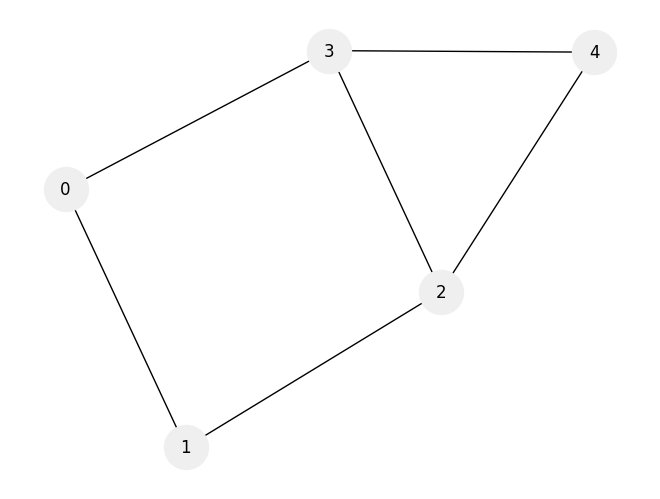

In [1]:
#ツールの読み込み
import networkx as nx
import matplotlib.pyplot as plt

#オプション。点のサイズ、点の番号の表示、色を調整
options = {'node_size': 1000,'with_labels':'True','node_color':'#efefef'}

#初期化
G = nx.Graph()
#ノードを追加
G.add_nodes_from([0,1,2,3,4])

#エッジを追加
G.add_edges_from([(0,1),(0,3),(1,2),(2,3),(2,4),(3,4)])

#グラフを描く
nx.draw(G, pos=nx.spring_layout(G, seed=1234), **options)

In [2]:
from tytan import symbols, Compile, sampler

# 変数を定義
q = symbols("q_{0:5}") #ノードの数だけ量子ビットを定義する。

そして上のQUBO式をそのまま入れます。

In [3]:
C = -2*q[0] -2*q[1] -3*q[2] -3*q[3] -2*q[4] +2*q[0]*q[1] +2*q[1]*q[2] +2*q[0]*q[3] +2*q[2]*q[3] +2*q[2]*q[4] +2*q[3]*q[4]
print(C)

2*q_{0}*q_{1} + 2*q_{0}*q_{3} - 2*q_{0} + 2*q_{1}*q_{2} - 2*q_{1} + 2*q_{2}*q_{3} + 2*q_{2}*q_{4} - 3*q_{2} + 2*q_{3}*q_{4} - 3*q_{3} - 2*q_{4}


定式化ができましたので、これをソルバー（計算してくれるプログラム）に入れます。  

In [4]:
# Compileクラスを使用して、QUBOを取得
Q, offset = Compile(C).get_qubo()

print(Q)

{('q_{2}', 'q_{2}'): -3.0, ('q_{3}', 'q_{3}'): -3.0, ('q_{0}', 'q_{0}'): -2.0, ('q_{1}', 'q_{1}'): -2.0, ('q_{4}', 'q_{4}'): -2.0, ('q_{0}', 'q_{1}'): 2.0, ('q_{0}', 'q_{3}'): 2.0, ('q_{1}', 'q_{2}'): 2.0, ('q_{2}', 'q_{3}'): 2.0, ('q_{2}', 'q_{4}'): 2.0, ('q_{3}', 'q_{4}'): 2.0}


ソルバーはSimualtedAnnealingSamplerを利用します。num_readsは100回計算します。計算結果は表形式で出ます。

In [5]:
# サンプラーを選択
solver = sampler.SASampler()

#クラウドサンプラーの場合
#API_KEY = "API key"
#solver = sampler.NQSSampler()
#result = solver.run(Q, api_key=API_KEY)

# 計算
result = solver.run(Q, shots=100)
print(result)

----------------------------------------
[[{'q_{0}': 0, 'q_{1}': 1, 'q_{2}': 0, 'q_{3}': 1, 'q_{4}': 0}, -5.0, 20], [{'q_{0}': 0, 'q_{1}': 1, 'q_{2}': 0, 'q_{3}': 1, 'q_{4}': 1}, -5.0, 28], [{'q_{0}': 1, 'q_{1}': 0, 'q_{2}': 1, 'q_{3}': 0, 'q_{4}': 0}, -5.0, 23], [{'q_{0}': 1, 'q_{1}': 0, 'q_{2}': 1, 'q_{3}': 0, 'q_{4}': 1}, -5.0, 14], [{'q_{0}': 0, 'q_{1}': 0, 'q_{2}': 1, 'q_{3}': 1, 'q_{4}': 0}, -4.0, 8], [{'q_{0}': 1, 'q_{1}': 0, 'q_{2}': 0, 'q_{3}': 0, 'q_{4}': 1}, -4.0, 1], [{'q_{0}': 1, 'q_{1}': 1, 'q_{2}': 0, 'q_{3}': 0, 'q_{4}': 1}, -4.0, 4], [{'q_{0}': 0, 'q_{1}': 0, 'q_{2}': 0, 'q_{3}': 1, 'q_{4}': 1}, -3.0, 1], [{'q_{0}': 1, 'q_{1}': 1, 'q_{2}': 1, 'q_{3}': 0, 'q_{4}': 0}, -3.0, 1]]


そして、一番いい答えをエネルギーから選びます。

In [6]:
print("Sample =", result[0][0])
print("Cost =", result[0][1] + offset)

Sample = {'q_{0}': 0, 'q_{1}': 1, 'q_{2}': 0, 'q_{3}': 1, 'q_{4}': 0}
Cost = -5.0


結果をグラフで確認します。
量子ビットが0のときノードを赤で、1のとき青で表示します。
グラフから分かるように、MAXCUT=5と求めることが出来ました。

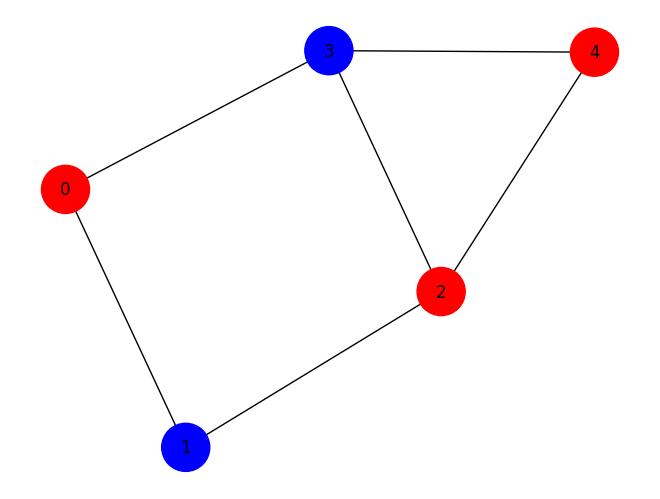

In [7]:
#ツールの読み込み
import networkx as nx
import matplotlib.pyplot as plt

#オプション。点のサイズ、点の番号の表示、色を調整。
#options = {'node_size': 1200,'with_labels':'True','node_color':'#efefef'}
options = {'node_size': 1200,'with_labels':'True'}

#初期化
G = nx.Graph()

#ノードを追加0,1,2,3,4のリストで追加。
G.add_nodes_from([0,1,2,3,4])

#エッジを追加
G.add_edges_from([(0,1),(0,3),(1,2),(2,3),(2,4),(3,4)])

#色の指定
c =['red','blue','red','blue','red']

#グラフを描く
nx.draw(G, pos=nx.spring_layout(G, seed=1234), **options,node_color=c)

## 1-2. 自然数分割問題
自然数分割問題は自然数(0より大きい数)を二つのグループに分け、それぞれのグループの自然数の和が同じようになるようにする問題です。 
自然数を2グループに分けるために、$i$番目の自然数がグループ0に属するとき$q_i=0$、グループ1のときは、$q_i=1$とします。
こちらのQUBOは、

$$
H = (\sum_i n_i*(2q_i-1))^2
$$

となります。元はイジングで、

$$
H = (\sum_i n_i*x_i)^2
$$

の式をQUBOに変換した形になります。

### 問題設定
$[3,6,5,6,5,2,6,5]$の配列（合計38）を二つに分けます。量子ビットは配列の要素数である8用意します。

In [8]:
from tytan import symbols, Compile, sampler

arr = [3,6,5,6,5,2,6,5]

# 変数を定義
q = symbols("q_{0:8}")

C = 0
for i in range(8):
    C += arr[i]*(2*q[i]-1)
    
C = C**2
C = C.expand()
print(C)

#地道に書いてもOK
#C = (3*(2*q[0]-1) + 6*(2*q[1]-1) + 5*(2*q[2]-1) + 6*(2*q[3]-1) + 5*(2*q[4]-1) + 2*(2*q[5]-1) + 6*(2*q[6]-1) + 5*(2*q[7]-1))**2

#配列を部分的に使ってもOK
#C = (arr[0]*(2*q[0]-1) + arr[1]*(2*q[1]-1) + arr[2]*(2*q[2]-1) + arr[3]*(2*q[3]-1) + arr[4]*(2*q[4]-1) + arr[5]*(2*q[5]-1) + arr[6]*(2*q[6]-1) + arr[7]*(2*q[7]-1))**2

36*q_{0}**2 + 144*q_{0}*q_{1} + 120*q_{0}*q_{2} + 144*q_{0}*q_{3} + 120*q_{0}*q_{4} + 48*q_{0}*q_{5} + 144*q_{0}*q_{6} + 120*q_{0}*q_{7} - 456*q_{0} + 144*q_{1}**2 + 240*q_{1}*q_{2} + 288*q_{1}*q_{3} + 240*q_{1}*q_{4} + 96*q_{1}*q_{5} + 288*q_{1}*q_{6} + 240*q_{1}*q_{7} - 912*q_{1} + 100*q_{2}**2 + 240*q_{2}*q_{3} + 200*q_{2}*q_{4} + 80*q_{2}*q_{5} + 240*q_{2}*q_{6} + 200*q_{2}*q_{7} - 760*q_{2} + 144*q_{3}**2 + 240*q_{3}*q_{4} + 96*q_{3}*q_{5} + 288*q_{3}*q_{6} + 240*q_{3}*q_{7} - 912*q_{3} + 100*q_{4}**2 + 80*q_{4}*q_{5} + 240*q_{4}*q_{6} + 200*q_{4}*q_{7} - 760*q_{4} + 16*q_{5}**2 + 96*q_{5}*q_{6} + 80*q_{5}*q_{7} - 304*q_{5} + 144*q_{6}**2 + 240*q_{6}*q_{7} - 912*q_{6} + 100*q_{7}**2 - 760*q_{7} + 1444


In [9]:
# Compileクラスを使用して、QUBOを取得
Q, offset = Compile(C).get_qubo()

# QUBOを表示
#print(Q)

# サンプラーを選択
solver = sampler.SASampler()

#クラウドサンプラーの場合
#API_KEY = "API key"
#solver = sampler.NQSSampler()
#result = solver.run(Q, api_key=API_KEY)

# 計算
result = solver.run(Q, shots=100)
print("Sample =", result[0][0])
print("Cost =", result[0][1] + offset)

----------------------------------------
Sample = {'q_{0}': 1, 'q_{1}': 0, 'q_{2}': 0, 'q_{3}': 0, 'q_{4}': 1, 'q_{5}': 0, 'q_{6}': 1, 'q_{7}': 1}
Cost = 0


上記は数えて19となり、38のちょうど半分なのでOK！以上です！
結果を確認すると、  
$[3,6,5,6,5,2,6,5]$の配列を0と1のグループで、$[0,0,0,1,0,1,1,1]$と2グループに分ける結果が得られています。
